# Comparison between decile and recidivism score

In this notebook, we will compare the decile score with the recidivism score. This will serve as a baseline for our models.

In [9]:
import pandas as pd

## EXtract the scores from the raw data

In [25]:
# import raw data and take out race, decile score and recidivism score

data_file_path = '../data/raw/compas-scores-two-years.csv'
df_data = pd.read_csv(data_file_path)

df_result = df_data[['decile_score', 'two_year_recid', 'race']]

We compare the two scores, where decile_score is the predicted score and recidivism score is the actual score. We will

- create a confusion matrix
- calculate accuracy
- calcilate F1 score
- create a ROC curve
- calculate AUC

Predicted     0     1
Actual               
0          3561   402
1          2250  1001
Accuracy: 0.6324
F1-Score: 0.4302
ROC-AUC: 0.7022


C:\Users\carme\AppData\Local\Temp\ipykernel_124692\3073657478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['decile_score_high_low'] = df_result['decile_score'].apply(lambda x: 1 if x >= 8 else 0)


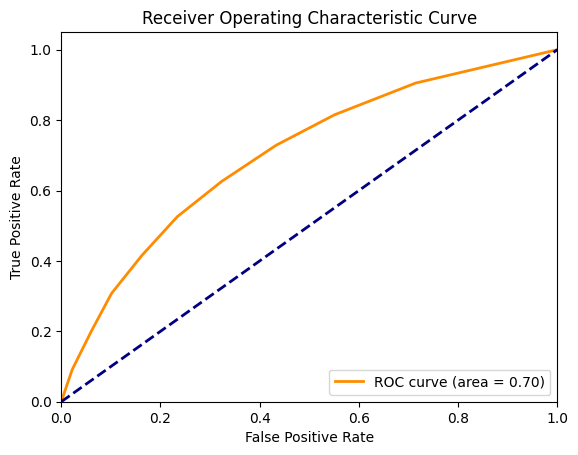

<Figure size 640x480 with 0 Axes>

In [26]:
# save the result to a new csv file
result_file_path = '../data/processed/compas-decile-recid.csv'
df_result.to_csv(result_file_path, index=False)

# create a new column to assigne decile_score to high or low probability with a threshold of 5
df_result['decile_score_high_low'] = df_result['decile_score'].apply(lambda x: 1 if x >= 8 else 0)

# create confusion matrix with this new result, showing the numbers of true positive, true negative, false positive and false negative
confusion_matrix = pd.crosstab(df_result['two_year_recid'], df_result['decile_score_high_low'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_file_path = '../results/compas-decile-recid-confusion-matrix.csv'
confusion_matrix.to_csv(confusion_matrix_file_path)
print(confusion_matrix)

# calculate the accuracy of the model
accuracy = (df_result['decile_score_high_low'] == df_result['two_year_recid']).mean()
print(f"Accuracy: {accuracy:.4f}")

# calculate the f1 score of the model
from sklearn.metrics import f1_score
f1 = f1_score(df_result['two_year_recid'], df_result['decile_score_high_low'])
print(f"F1-Score: {f1:.4f}")

# create a ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(df_result['two_year_recid'], df_result['decile_score'])
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

# plot the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig('../results/compas-decile-recid-roc-curve.png')



In [29]:
# Now calculate the accuracy and f1 score for each race

for race in df_result['race'].unique():
    df_race = df_result[df_result['race'] == race]
    accuracy = (df_race['decile_score_high_low'] == df_race['two_year_recid']).mean()
    f1 = f1_score(df_race['two_year_recid'], df_race['decile_score_high_low'])
    print(f"Accuracy for {race}: {accuracy:.4f} \t\t F1-Score for {race}: {f1:.4f}")


Accuracy for Other: 0.6844 		 F1-Score for Other: 0.2516
Accuracy for African-American: 0.6093 		 F1-Score for African-American: 0.5065
Accuracy for Caucasian: 0.6528 		 F1-Score for Caucasian: 0.3140
Accuracy for Hispanic: 0.6499 		 F1-Score for Hispanic: 0.2542
Accuracy for Native American: 0.6667 		 F1-Score for Native American: 0.6250
Accuracy for Asian: 0.7500 		 F1-Score for Asian: 0.3333
